## Objetivos de Aprendizagem

- Compreender os fundamentos do Deep Learning aplicado à visão computacional
- Dominar o uso de TensorFlow/Keras para construção de modelos de redes neurais convolucionais (CNNs)
- Avaliar e otimizar modelos de visão computacional

In [40]:
# !pip install tensorflow

## Deep Learning para Visão Computacional

A visão computacional é uma área da inteligência artificial que busca capacitar os computadores a "enxergar" e interpretar o mundo visual de maneira similar aos humanos. Os recentes avanços nesse campo devem-se principalmente às técnicas de deep learning, especialmente às Redes Neurais Convolucionais (CNNs).

### Por que Deep Learning para Visão?

Antes do deep learning, a visão computacional dependia fortemente de engenharia manual de características (feature engineering). Os pesquisadores precisavam definir explicitamente quais atributos extrair das imagens (bordas, cantos, texturas, etc.) para cada problema específico.

O deep learning trouxe três grandes vantagens:

1. **Aprendizado automático de características**: As redes neurais profundas aprendem automaticamente quais características são relevantes para o problema
2. **Hierarquia de representações**: Através de suas múltiplas camadas, as redes aprendem representações em diferentes níveis de abstração
3. **Generalização**: Capacidade de generalizar padrões complexos para imagens nunca vistas antes

### Principais tarefas em Visão Computacional

- **Classificação de Imagens**: Atribuir uma categoria a uma imagem inteira (ex: "gato", "cachorro", "carro")
- **Detecção de Objetos**: Localizar e classificar múltiplos objetos em uma imagem
- **Segmentação Semântica**: Classificar cada pixel de uma imagem em categorias específicas
- **Segmentação de Instâncias**: Distinguir diferentes instâncias da mesma classe
- **Estimação de Pose**: Detectar a postura de pessoas ou objetos em uma imagem
- **Geração de Imagens**: Criar imagens novas com características específicas (GANs, VAEs)

## Configuração do Ambiente

Primeiro, vamos configurar nosso ambiente instalando as bibliotecas necessárias.

In [41]:
# Instalar bibliotecas necessárias
# !pip install tensorflow tensorflow-datasets matplotlib numpy pandas opencv-python pillow

# Importar bibliotecas
import tensorflow as tf
import keras
from tensorflow.keras import layers, models, applications
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

# Verificar versões instaladas
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"OpenCV version: {cv2.__version__}")

# Verificar se GPU está disponível
print("\nDispositivos físicos disponíveis:")
print(tf.config.list_physical_devices())
print("\nGPUs disponíveis:")
print(tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
Keras version: 3.9.2
NumPy version: 1.23.5
OpenCV version: 4.8.0

Dispositivos físicos disponíveis:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

GPUs disponíveis:
[]


In [42]:
200*200*100

4000000

### Diferença entre MLP e CNN

- **MLP (Perceptron Multicamadas)**: Em uma MLP, cada pixel da imagem é tratado de forma **independente**, como se fosse apenas um número em um vetor. Isso significa que **relações espaciais** entre os pixels — como bordas, texturas ou padrões — **não são consideradas**. Por exemplo, um pixel no canto da imagem é tratado da mesma forma que um pixel no centro.

- **CNN (Rede Neural Convolucional)**: Já em uma CNN, a estrutura da imagem é **preservada**. Através do uso de **filtros convolucionais**, a rede consegue capturar **padrões locais**, como bordas, formas e texturas, levando em conta a **proximidade e a posição relativa** dos pixels. Isso torna a CNN muito mais eficaz para tarefas de visão computacional.

- **Quantidade de parâmetros**: Outro ponto importante é a **eficiência**. Em uma MLP, o número de parâmetros cresce rapidamente com o tamanho da imagem. Por exemplo, para uma imagem em escala de cinza de **200x200 pixels** conectada a uma camada com **100 neurônios**, teríamos:

  $$
  \text{Parâmetros} = (200 \times 200 \times 100) + 100 = 4.000.100
  $$

  Isso apenas na **primeira camada**! Já em uma CNN, os filtros são **muito menores** (por exemplo, 3x3 ou 5x5), e são **compartilhados** por toda a imagem, o que reduz drasticamente o número de parâmetros e melhora a generalização.

![](lab_images/flatten.png)

In [43]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D


minha_rede = Sequential([
    Input(shape=(200,200)), # camada de entrada
    Flatten(), 
    Dense(units=100), # camada densa com 100 neurônios MLP
    Dense(units=10) # camada de saída com 10 neurônios
    ])

print("\nModelo criado com sucesso!")
minha_rede.summary()




Modelo criado com sucesso!


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │     4,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001,110 (15.26 MB)

 Trainable params: 4,001,110 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

## Redes Neurais Convolucionais (CNNs)

As Redes Neurais Convolucionais (CNNs) são a principal arquitetura utilizada em tarefas de visão computacional. Elas foram inspiradas no funcionamento do **córtex visual** dos animais, onde diferentes neurônios respondem a diferentes regiões do campo visual.

### Componentes Fundamentais de uma CNN

1. **Camadas Convolucionais**  
   Aplicam filtros (ou kernels) sobre a imagem para extrair **características locais**, como bordas, texturas e padrões.

2. **Funções de Ativação**  
   Introduzem **não-linearidade** no modelo. A mais comum é a **ReLU (Rectified Linear Unit)**, que ajuda a rede a aprender representações mais complexas.

3. **Camadas de Pooling**  
   Reduzem a **dimensão espacial** das representações (ex: MaxPooling), diminuindo a complexidade computacional e ajudando na generalização.

4. **Camadas Fully Connected (Densas)**  
   Conectam todos os neurônios da camada anterior e são responsáveis pela **classificação final** com base nas características extraídas.

5. **Batch Normalization**  
   Normaliza as ativações de uma camada, acelerando o treinamento e melhorando a **estabilidade** da rede.

6. **Dropout**  
   Técnica de **regularização** que desativa aleatoriamente alguns neurônios durante o treinamento, ajudando a evitar **overfitting**.


Esses componentes trabalham juntos para permitir que a CNN aprenda **representações hierárquicas** da imagem — das bordas simples nas primeiras camadas até formas e objetos complexos nas camadas mais profundas.


## Convolução


A **convolução**, permite a **filtragem no domínio espacial** da imagem. Esse processo é realizado por meio da aplicação de **filtros** (ou **kernels**) que percorrem a imagem original.

### O que é um kernel?

Um **kernel** é uma matriz (geralmente 3x3) que é posicionada sobre cada região da imagem. A cada posição, realiza-se uma operação chamada **produto de convolução**, que consiste em:

1. Multiplicar os valores do kernel pelos valores dos pixels correspondentes da imagem.
2. Somar os resultados.
3. Atribuir esse valor ao pixel correspondente na imagem de saída (mapa de ativação).

> Durante o treinamento, os valores dos kernels são ajustados automaticamente pelo algoritmo de **backpropagation**, permitindo que a rede aprenda os filtros mais úteis para a tarefa.

Na animação abaixo:
- A imagem original está em **azul**.
- O kernel (filtro) está em **cinza**, percorrendo a imagem.
- O resultado da convolução aparece em **verde**.

![](lab_images/same_padding_no_strides.gif)


### Zoom em um único pixel

Aqui vemos o que acontece ao aplicar o kernel em **uma única região** da imagem:


![](lab_images/convolution.png)


### Repetição do processo

Esse processo se repete para **cada região da imagem**, gerando um novo mapa de características:


![](lab_images/conv3d.gif)


### Resultado final da convolução

O resultado final é uma nova imagem (ou mapa de ativação), que destaca as **características extraídas** pelo kernel:


![](lab_images/convexp.png)


### Implementação em Código

A implementação de uma camada convolucional com **Keras** é bastante simples. Veja um exemplo:

```python
from tensorflow.keras import layers

# Camada convolucional com 100 filtros de tamanho 3x3
layers.Conv2D(100, (3, 3))
```

####  Explicando os parâmetros:

- 100: número de filtros (kernels) que serão aprendidos pela rede.
- (3, 3): tamanho de cada filtro (altura x largura).

Outros parâmetros úteis:
- padding = 'same': mantem o dimensional de saida igual ao de entrada.
- activation='relu': função de ativação aplicada após a convolução.
- input_shape=(altura, largura, canais): define o formato da imagem de entrada (necessário apenas na primeira camada).


In [44]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    keras.Input(shape=(200,200, 3)),
    layers.Conv2D(filters = 100, kernel_size = (3, 3), padding='same'),
    
    layers.Conv2D(filters = 100, kernel_size = (3, 3), padding='same'),
    
    # layers.MaxPooling2D(pool_size=(2, 2)),
    # layers.Conv2D(filters = 100, kernel_size = (3, 3)),
    # layers.MaxPooling2D(pool_size=(2, 2)),
   
   
    # layers.Flatten(), 
    # layers.Dense(units=100) # camada densa com 100 neurônios
])

model.summary()



Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 200, 200, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 200, 200, 100)  │        90,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,900 (362.89 KB)

 Trainable params: 92,900 (362.89 KB)

 Non-trainable params: 0 (0.00 B)

Compare a quantidade de ``Total params``, em uma rede CNN esse valor é menor ou maior comparado com uma rede MLP?

## Pooling


A camada de **pooling** realiza uma operação de **redução espacial** da imagem de entrada, mantendo as **características mais relevantes**. Essa etapa ajuda a:

- Reduzir o custo computacional
- Diminuir o risco de overfitting
- Tornar a rede mais robusta a pequenas variações (como deslocamentos)


### Como funciona?

A operação de pooling percorre a imagem com uma janela (kernel), geralmente de **2x2**, e aplica uma função de agregação sobre os valores da região.

- O **stride** (passo) mais comum é 2, o que reduz a imagem pela metade em cada dimensão.
- A função de agregação pode ser:
  - `MaxPooling`: seleciona o **maior valor** da região
  - `AveragePooling`: calcula a **média** dos valores da região


A imagem abaixo mostra como o pooling reduz a resolução da imagem, mantendo os padrões mais importantes:

![](lab_images/pooling.png)


### Resultado final da operação de pooling

Veja como a imagem é transformada após a aplicação do pooling:

![](lab_images/poolingexp1.png)


### Implementação em Código

A camada de pooling pode ser implementada com Keras. Veja um exemplo usando **MaxPooling**:

```python
from tensorflow.keras import layers

# Camada de MaxPooling com filtro 2x2 e stride 2
layers.MaxPool2D(pool_size=2, strides=2)
```

#### Explicando os parâmetros:
- pool_size=2: define o tamanho da janela (2x2) que será usada para a operação de pooling.
- strides=2: define o passo com que a janela se move pela imagem. Com stride 2, a imagem é reduzida pela metade em cada dimensão.

Outros argumentos também podem ser utilizados, data_format, entre outros. Consulte a documentação oficial do Keras para mais detalhes.


In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    keras.Input(shape=(200,200, 3)),
   
   # bloco de convolução 1
    layers.Conv2D(filters = 100, kernel_size = (3, 3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
   # bloco de convolução 2
    # layers.Conv2D(filters = 100, kernel_size = (3, 3), activation='relu'),
    # layers.MaxPooling2D(pool_size=(2, 2)),
   
   
    # layers.Flatten(), 
    # layers.Dense(units=100) # camada densa com 100 neurônios
])

model.summary()



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 200, 200, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 100, 100, 100)  │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,800 (10.94 KB)

 Trainable params: 2,800 (10.94 KB)

 Non-trainable params: 0 (0.00 B)

#### Para refletir

1. Qual o dimensional da imagem antes e depois do pooling ?

2. Com a camada de pooling teve alteração ``total params``?



## Extração de Características

É nesse processo que a rede aprende a identificar **padrões visuais relevantes** em uma imagem, como bordas, texturas, formas e estruturas mais complexas.

### Como funciona?

- As **camadas convolucionais** aplicam filtros que detectam padrões locais.
- As **camadas de pooling** reduzem a dimensionalidade, mantendo as informações mais importantes.
- O resultado é um conjunto de **mapas de ativação** que representam as características extraídas da imagem.

Essas características são então **encaminhadas para uma MLP (rede neural densa)**, que realiza a **classificação final** com base nas informações extraídas.

### Arquitetura típica

A imagem abaixo mostra uma arquitetura típica de CNN, onde:

- As primeiras camadas extraem características
- As últimas camadas (fully connected) realizam a classificação

![](lab_images/convnet.png)




## Camadas Fully Connected (Densas)

As **camadas densas** (ou **fully connected**) são responsáveis pela **classificação final** na maioria das CNNs. Elas conectam **todos os neurônios** da camada anterior a **todos os neurônios** da camada atual.

### O que fazem?

- Recebem os **mapas de ativação** extraídos pelas camadas convolucionais e de pooling.
- Transformam essas ativações em uma **representação vetorial**.
- Realizam a **decisão final**, como classificar uma imagem entre diferentes categorias.

> Ao contrário das camadas convolucionais, as camadas densas **não preservam a estrutura espacial** da imagem.


In [46]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    keras.Input(shape=(200,200, 3)),
   
   # extrator de características CNN
   
   # bloco de convolução 1
    layers.Conv2D(filters = 32, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
#    bloco de convolução 2
    layers.Conv2D(filters = 64, kernel_size = (3, 3),padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
   #    bloco de convolução 3
    layers.Conv2D(filters = 128, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    #    bloco de convolução 4
    layers.Conv2D(filters = 256, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
   
   # MLP densa
    layers.Flatten(), 
    layers.Dense(units=128,activation='relu'), # camada densa com 100 neurônios
    
    layers.Dense(units=20,activation='softmax') # camada densa com 10 neurônios
])

model.summary()



Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,109,716 (19.49 MB)

 Trainable params: 5,109,716 (19.49 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    keras.Input(shape=(200,200, 3)),
   
   # extrator de características CNN
   
   # bloco de convolução 1
    layers.Conv2D(filters = 32, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
#    bloco de convolução 2
    layers.Conv2D(filters = 64, kernel_size = (3, 3),padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
   #    bloco de convolução 3
    layers.Conv2D(filters = 128, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    #    bloco de convolução 4
    layers.Conv2D(filters = 256, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
   
   # MLP densa
    layers.Flatten(), 
    layers.Dense(units=128,activation='relu'), # camada densa com 100 neurônios
    
    layers.Dense(units=1,activation='sigmoid') # camada densa com 10 neurônios
])

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,107,265 (19.48 MB)

 Trainable params: 5,107,265 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

## Funções de Ativação

As funções de ativação introduzem **não-linearidade** nas redes neurais, permitindo que elas aprendam padrões complexos. A escolha da função de ativação pode impactar diretamente o desempenho e a capacidade de generalização da rede.

### Principais funções:

- **ReLU (Rectified Linear Unit)**: zera valores negativos, mantém os positivos.
- **Sigmoid**: comprime os valores para o intervalo (0, 1). Boa para saídas binárias.
- **Softmax**: converte os logits em probabilidades normalizadas. Ideal para classificar imagens em categoria (classificação multiclasse)
- **Leaky ReLU**: variante da ReLU que permite pequenos valores negativos, evitando o problema de neurônios mortos.

Abaixo, visualizamos como cada função transforma os dados de entrada:
![](lab_images/ativacao.png)

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    keras.Input(shape=(200,200, 3)),
   
   # bloco de convolução 1
    layers.Conv2D(filters = 100, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
#    bloco de convolução 2
    layers.Conv2D(filters = 100, kernel_size = (3, 3),padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
   #    bloco de convolução 3
    layers.Conv2D(filters = 100, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    #    bloco de convolução 4
    layers.Conv2D(filters = 100, kernel_size = (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
   
   
    layers.Flatten(), 
    layers.Dense(units=100, activation='relu'), # camada densa com 100 neurônios e ativação ReLU
    
    layers.Dense(units=10,activation='softmax') # camada densa com 10 neurônios
])

model.summary()



Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 200, 200, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 100, 100, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 100, 100, 100)  │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 50, 50, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 50, 50, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 25, 25, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 25, 25, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 12, 12, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │     1,440,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,714,210 (6.54 MB)

 Trainable params: 1,714,210 (6.54 MB)

 Non-trainable params: 0 (0.00 B)

## Exemplo prático - Fashion MNIST

Vamos utilizar novamente o dataset do Fashion MNIST para classificação de imagens, mas desta vez vamos utilizar uma CNN para realizar a extração de caracteristicas da imagem seguida de um classificador MLP.


In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


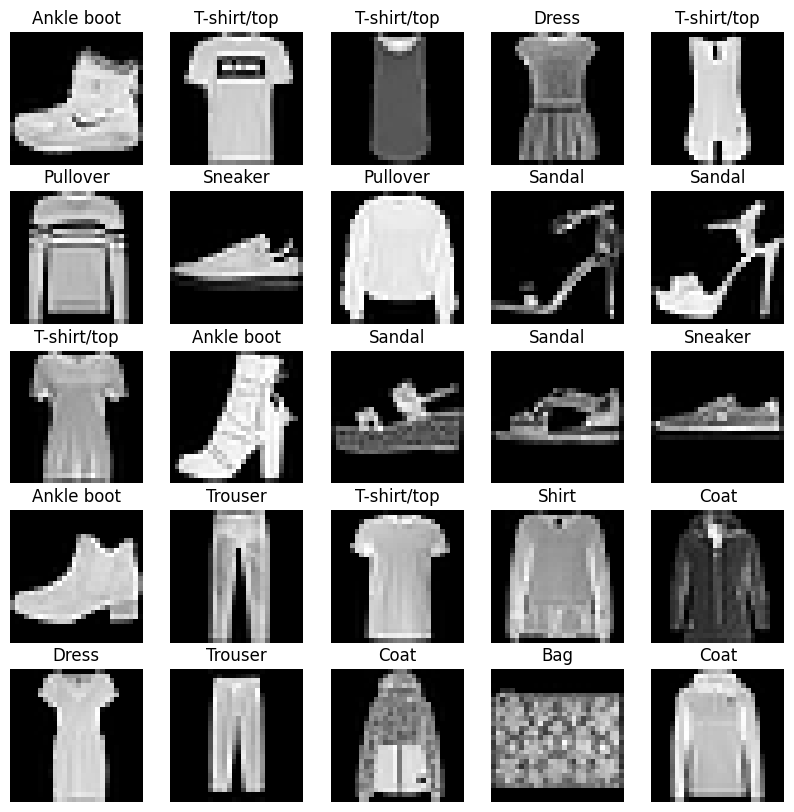

In [50]:
# Importa o dataset Fashion Mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Verifica o tamanho do dataset
print(f"train_images shape: {train_images.shape}")
print(f"train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}")
print(f"test_labels shape: {test_labels.shape}")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualiza as primeiras 25 imagens do dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis("off")
plt.show()

### Preprocessamento de Dados para Redes Neurais

Existem diversas processos que podem ser realizados, mas por enquanto vamos realizar apenas:

- `Reshape`: Transformação dos dados de entrada para o formato (batch_size, altura, largura, canais).
- `Normalização`: Ajuste dos valores dos pixels para um intervalo específico, geralmente entre 0 e 1 ou -1 e 1. Melhora a estabilidade do treinamento e acelera a convergência do modelo.

In [51]:

train_images = train_images.reshape(60000,28,28,-1) # reshape para adicionar a dimensão do canal de cores tensor (60000, 28, 28, 1)

# a rede espera imagens com 4 dimensões (batch_size, altura, largura, canais) 
# Vamos adicionar uma dimensão extra para o canal de cor (1 para escala de cinza) por que o dataset é em escala de cinza
# train_images = np.expand_dims(train_images, axis=-1) # axis=-1 adiciona a dimensão no final
test_images = np.expand_dims(test_images, axis=-1)
# Verifica o tamanho do dataset após adicionar a dimensão extra
print(f"train_images shape atualizado: {train_images.shape}")
print(f"test_images shape atualizado: {test_images.shape}")

# a normalização dos dados é importante para que a rede aprenda mais rápido e melhor
# a normalização é feita dividindo os valores dos pixels por 255.0
# Isso transforma os valores dos pixels de 0-255 para 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0


train_images shape atualizado: (60000, 28, 28, 1)
test_images shape atualizado: (10000, 28, 28, 1)


In [52]:
len(class_names)

10

In [53]:
###### montar a arquitetura da rede neural

from tensorflow.keras import layers

model = keras.Sequential([

    keras.Input(shape=(28, 28, 1)),  # imagem de entrada
    
#####-------CNN-------#####
    
    layers.Conv2D(5, (3,3), activation='relu', padding="same"),
    layers.MaxPooling2D((2,2)),

 #######------ MLP-----####
 
    # Flatten (transformar o mapa de características em um vetor)
    layers.Flatten(), 
    # Camadas densas para classificação
    layers.Dense(120, activation='relu'),
    layers.Dense(10, activation='softmax')  ###### neuroniios especialistas
])

model.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 28, 28, 5)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 14, 14, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 980)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 120)            │       117,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,980 (464.77 KB)

 Trainable params: 118,980 (464.77 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compilar o modelo
model.compile(
    optimizer='adam', # otimizador Adam
    loss='sparse_categorical_crossentropy', # função de perda para classificação multiclasse
    metrics=['accuracy']) # função de métrica para avaliar o desempenho do modelo


In [55]:
# Treinar o modelo
epochs_hist = model.fit(train_images, train_labels, epochs=50, validation_split=0.2)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7663 - loss: 0.6545 - val_accuracy: 0.8309 - val_loss: 0.4698
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8684 - loss: 0.3654 - val_accuracy: 0.8785 - val_loss: 0.3355
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8874 - loss: 0.3111 - val_accuracy: 0.8886 - val_loss: 0.3188
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9008 - loss: 0.2737 - val_accuracy: 0.8929 - val_loss: 0.3044
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9127 - loss: 0.2443 - val_accuracy: 0.8883 - val_loss: 0.3016
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9172 - loss: 0.2266 - val_accuracy: 0.9022 - val_loss: 0.2764
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9252 - loss: 0.2029 - val_accuracy: 0.9043 - val_loss: 0.2700
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9333 - loss: 0.1841 - 

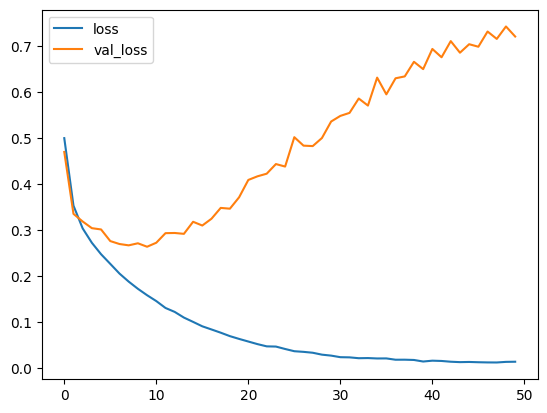

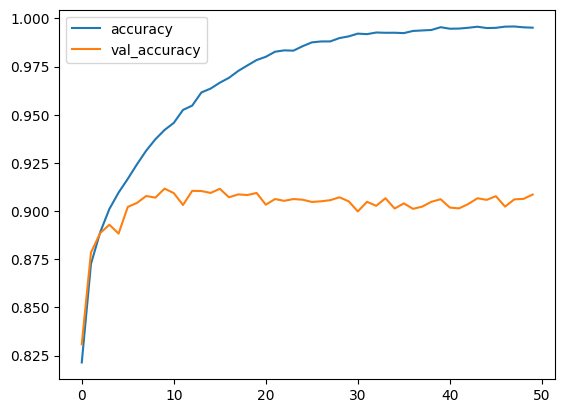

In [56]:
## exibe os graficos da função loss e acuracia
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(epochs_hist.history)

history_df[['loss','val_loss']].plot();
history_df[['accuracy','val_accuracy']].plot();


In [57]:
#Validadção
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


1875/1875 - 1s - 800us/step - accuracy: 0.9808 - loss: 0.1478
313/313 - 0s - 1ms/step - accuracy: 0.9026 - loss: 0.8260


In [58]:
# Previsões com o modelo treinado

predictions = model.predict(test_images)

predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step


array([8.1158808e-22, 2.7277927e-18, 1.7755991e-24, 8.5628169e-25,
       7.4483921e-25, 5.3087577e-14, 3.0103946e-20, 2.8505125e-11,
       3.9772162e-20, 1.0000000e+00], dtype=float32)

In [59]:
#Vericação dos itens preditos

item = 42

print(f"Classe predita foi {np.argmax(predictions[item])} "
      f"do item {class_names[np.argmax(predictions[item])]} "
      f"com {100*np.max(predictions[item]):.2f}% de confiança. "
      f"Classe correta é {test_labels[item]}, {class_names[test_labels[item]]}.")

Classe predita foi 6 do item Shirt com 86.19% de confiança. Classe correta é 3, Dress.


In [60]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

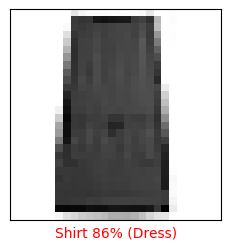

In [61]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(item, predictions, test_labels, test_images)
plt.show()

### Desafio

Vamos refinar o modelo retreinando com uma arquitetura de CNN mais completa.

Um exemplo de aplicação: https://github.com/gary30404/convolutional-neural-network-from-scratch-python


## Batch Normalization e Dropout

Durante o treinamento de redes neurais profundas, é comum enfrentar problemas como **instabilidade no aprendizado** e **overfitting**. Duas técnicas utilizadas para mitigar esses problemas são:

### Batch Normalization

A **Batch Normalization** (ou normalização em lote) é uma técnica que normaliza as ativações de uma camada, mantendo a média próxima de 0 e o desvio padrão próximo de 1.

#### Benefícios:
- Acelera o treinamento
- Reduz a sensibilidade à inicialização dos pesos
- Permite usar taxas de aprendizado maiores
- Atua como uma forma leve de regularização

> Saiba mais em: [https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/)

#### Exemplo de uso:

```python
layers.BatchNormalization()

```

### Dropout

O **Dropout** é uma técnica de regularização que desativa aleatoriamente uma fração dos neurônios durante o treinamento. Isso força a rede a não depender de neurônios específicos, promovendo robustez e generalização. Utilize dropout principalmente em redes densas (fully connected).

#### Benefícios:
- Reduz o overfitting
- Simples de implementar
- Funciona bem em redes densas e convolucionais

#### Exemplo de uso:

```python
layers.Dropout(0.5)  # desativa 50% dos neurônios durante o treinamento
```
> Saiba mais em: [https://www.deeplearningbook.com.br/capitulo-23-como-funciona-o-dropout/](https://www.deeplearningbook.com.br/capitulo-23-como-funciona-o-dropout/)


In [62]:
###### Seu código aqui......

### Para testar se melhora

model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),  # imagem de entrada
#####-------CNN-------#####
    layers.Conv2D(32, (3,3), activation='relu', padding="same"),
    layers.BatchNormalization(),   
    layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),      

    layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

 #######------ MLP-----####
 
    # Flatten (transformar o mapa de características em um vetor)
    layers.Flatten(),
    # Camadas densas para classificação
    layers.Dense(256, activation='relu'),
    # layers.BatchNormalization(), # pode ajudar a estabilizar o treinamento, tem que testar!
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') ###### neuroniios especialistas
])

model.summary()




Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,702,026 (6.49 MB)

 Trainable params: 1,701,578 (6.49 MB)

 Non-trainable params: 448 (1.75 KB)